In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random

nltk.download('stopwords')
  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Data Import
data = pd.read_json('reviewSelected100.json', lines=True, 
                    orient='records',encoding = "ISO-8859-1")

# Select business b1 and prepare B1
uniqueBusiness = data['business_id'].unique()
idx = random.randint(0, len(uniqueBusiness)-1)
print('random number for b1: ', idx)
b1 = uniqueBusiness[idx]
B1 = data.loc[data['business_id'] == b1]
B1 = pd.DataFrame(B1, columns = ['text'])
B1.rename(columns={"text": "original_text"}, inplace = True)

random number for b1:  79


In [3]:
B1.reset_index(inplace = True)
B1.drop(['index'], axis=1, inplace = True)
B1

,original_text
0,We bring our two dogs (German Shepherd and Gol...
1,This is my favorite dog bar in the area! I mis...
2,"Great concept in a great location, that being ..."
3,Just moved to NoDa this week and decided to tr...
4,This is literally my favorite place on earth. ...
...,...
95,Are you one of those people that feels guilty ...
96,We decided to give the Dog Bar a try last Satu...
97,I like this small dog bar. It's in a very arts...
98,I went here twice already. The most recent vis...


In [7]:
# Remove stopwords
for rowIdx in range(len(B1)):
    newString = ''
    s = B1.iloc[rowIdx]['original_text'].lower()
    for idx, word in enumerate(s.split(' ')):
        if word not in stopwords.words('english'):
            if idx == len(s)-1:
                newString = newString + word
            else:
                newString = newString + word + ' '
    
    B1.loc[rowIdx, 'text_without_stopwords'] = newString

In [8]:
B1

,original_text,text_without_stopwords
0,We bring our two dogs (German Shepherd and Gol...,bring two dogs (german shepherd golden retriev...
1,This is my favorite dog bar in the area! I mis...,favorite dog bar area! miss living closer it. ...
2,"Great concept in a great location, that being ...","great concept great location, said ton room im..."
3,Just moved to NoDa this week and decided to tr...,moved noda week decided try dog bar. parked pa...
4,This is literally my favorite place on earth. ...,literally favorite place earth. started brinin...
...,...,...
95,Are you one of those people that feels guilty ...,one people feels guilty every time leave pups ...
96,We decided to give the Dog Bar a try last Satu...,decided give dog bar try last saturday night. ...
97,I like this small dog bar. It's in a very arts...,like small dog bar. artsy part town. fenced do...
98,I went here twice already. The most recent vis...,went twice already. recent visit doggie's 2nd ...


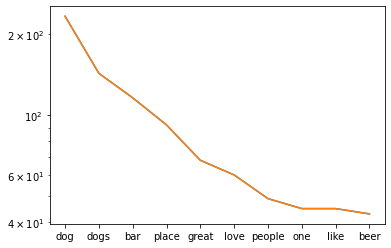

In [9]:
# Stemming
ps = PorterStemmer()
B1['stemmed_text'] = B1['text_without_stopwords'].apply(lambda x: ps.stem(x))

# Word Frequency Before Stemming
countsBefore = B1.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

# Word Frequency After Stemming
countsAfter = B1.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

In [12]:
# Select business b2 and prepare B2
uniqueBusiness = data['business_id'].unique()
idx2 = random.randint(0, len(uniqueBusiness)-1)
print('random num for b2: ', idx2)
b2 = uniqueBusiness[1]
B2 = data.loc[data['business_id'] == b2]
B2 = pd.DataFrame(B2, columns = ['text'])
B2.rename(columns={"text": "original_text"}, inplace = True)

random num for b2:  8


In [13]:
B2.reset_index(inplace = True)
B2.drop(['index'], axis=1, inplace = True)
B2

,original_text
0,Good Korean grill near Eaton Centre. The marin...
1,Good food..well you have to cook yourself.. bu...
2,I don't think I've ever been so disappointed i...
3,Great lunch price of $11 after tax and tip! \n...
4,Really bad service. You have to remind the ser...
...,...
95,You get what you pay for... and cheap is defin...
96,Was here by myself today. Probably should go w...
97,The only thing I like about this restaurant is...
98,Three friends and I dropped by here for lunch ...


In [14]:
# Remove stopwords
for rowIdx in range(len(B2)):
    newString = ''
    s = B2.iloc[rowIdx]['original_text'].lower()
    for idx, word in enumerate(s.split(' ')):
        if word not in stopwords.words('english'):
            if idx == len(s)-1:
                newString = newString + word
            else:
                newString = newString + word + ' '
    
    B2.loc[rowIdx, 'text_without_stopwords'] = newString

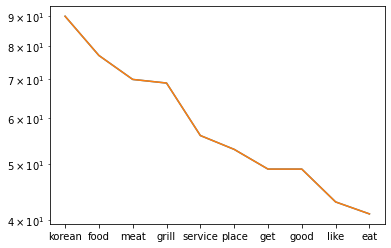

In [15]:
# Stemming
ps = PorterStemmer()
B2['stemmed_text'] = B2['text_without_stopwords'].apply(lambda x: ps.stem(x))

# Word Frequency Before Stemming
countsBefore = B2.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

# Word Frequency After Stemming
countsAfter = B2.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")